# DECRETO-GPT // CHAT-DNU

# Ley de Bases y Puntos de Partida para la Libertad de los Argentinos (27/12/2023)

## Que es esto?

forma parte del repo git https://github.com/vlasvlasvlas/decreto-gpt.

## Porqué?

Con el fin de comprender los Decretos de Necesidad de Urgencia (DNU) que desregulan la economía, emitidos el 20 de diciembre de 2023 y posteriores leyes por el presidente Javier Milei.

Permite generar una extracción a texto de los pdfs, y realizar preguntas específicas al DNUs y paquetes de leyes utilizando modelos LLM como GPT-4-Turbo (último release) de OpenAi.


## Update

Este notebook explora el siguiente documento: 

[x] MEN-2023-7-APN-PTE : Ley de Bases y Puntos de Partida para la Libertad de los Argentinos (27/12/2023)


## Cómo?

Descargando los scripts o corriendo las notebooks y pudiendo asi entender los componentes del decreto haciendole preguntas al documento pdf.

## Pasos para instalación

- Tener instalado Python 3.9+
- Idealmente levantar un entorno virtual (ej: python -m venv venv) y usarlo (source venv/bin/activate // o en Windows: venv\Scripts\activate)
- instalar las dependencias del requirements.txt (pip install -r requirements.txt)
- tener una key de openai (te registrás y te dan una key)
- renombar el archivo .env.dummy por .env y pegar ahí tu key de openai en el API_KEY
- se recomienda usar modelos que soporten muchos tokens (+19k para el decreto xq es largo), el mejorcito que me funcionó fue GPT-4-Turbo.
- revisá y ejecutá el archivo analisis.py para poder ir generando preguntas que necesites al doc
- revisá y utiliza el notebook analisis_con_respuestas.py para tenerlo en formato jupyter notebook o ipython con respuesta formateada en markdown, o para revisar preguntas ya hechas


## Quiero hacer preguntas!

- Descargate el repo y usalo en tu compu! haces las preguntas que necesites.

- Sino: podés subir las pregs que quieras como issue y las sumo al notebook: create un issue, poné la pregunta que quieras obtener una respuesta y las sumo al notebook correspondiente: https://github.com/vlasvlasvlas/decreto-gpt/issues poniendo en el subject a que documento querés realizar la pregunta, y cuál es la pregunta.


## Quiero ver las respuestas que ya existen

Abrite directamente el notebook donde hay respuestas a preguntas armadas, queres que suba mas preguntas? armate un issue y las voy sumando, o forkeate esto y pone las pregs que vos quieras.

Notebook MEN-2023-7-APN-PTE : https://github.com/vlasvlasvlas/decreto-gpt/blob/main/notebooks/MEN-2023-7-APN-PTE_analisis_con_respuestas.ipynb


## Langchain chat-your-data versión disponible 

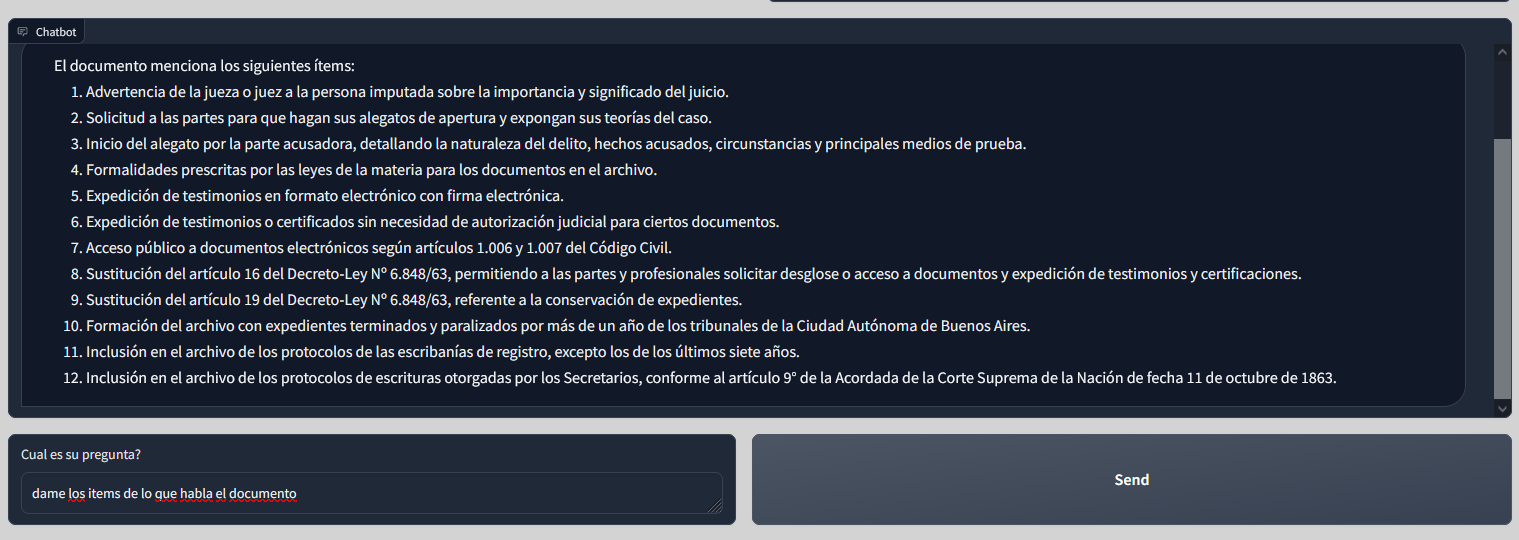

Se suma una versión del gran repo de chat-your-data de langchain (https://github.com/hwchase17/chat-your-data)

- lo podés usar de la carpeta de /langchain/chat-your-data/ del repo para el que le guste meter mano desde esa perspectiva.
- YA esta creada la vector-database con el contenido del DNU! 
- instalate las dependencias de la carpeta (pip install -r requirements.txt)
- Tenés que correr un export OPENAI_API_KEY=tu_clave
- Levantás la aplicación con python app.py, y listop.


## Otras fuentes de conocimiento

- se volcó a texto utf-8 el total del documento dnu y está disponible en este repo con el nombre dnu_a_texto.txt

- @agussxng (tw) armó este detalle del DNU que también esta super bueno para entender un poco más: https://docs.google.com/document/d/1vvddhIhH5MRPc2Rk1XtkBW0PV76_y5G_5UVt8v1I61A/edit

- BLapp, Asuntos Públicos y Parlamentarios, subió un pdf el cual dejo disponible en el git (Analisis_Decreto_de_Necesidad_y_Urgencia_Bases_para_la_Reconstrucción.pdf), el cual pueden acceder, tiene una especie de diff con las modificaciones de cada ley, muy bueno.

- @rama_moyano_ (tw) creó una gui para un gpt también! necesitas plus para usarlo pero acá la info: https://twitter.com/rama_moyano_/status/1737831367218716964




### Preparación

In [1]:
import dotenv
import os

import openai
import PyPDF2

from IPython.display import display, Markdown

In [2]:
# Recarga las variables en tu archivo '.env' (sobrescribe las variables existentes).
dotenv.load_dotenv(".env", override=True)

# Ahora puedes acceder a las variables de entorno usando la función `os.getenv()`
api_key = os.getenv("API_KEY")


In [4]:
# Configurar OpenAI
openai.api_key = api_key


def leer_pdf(ruta):
    with open(ruta, 'rb') as pdf_file_obj:
        pdf_reader = PyPDF2.PdfReader(pdf_file_obj)
        
        texto = ""
        
        # Utiliza len(pdf_reader.pages) en lugar de pdf_reader.numPages
        for num_pagina in range(len(pdf_reader.pages)):
            pagina = pdf_reader.pages[num_pagina]  # Utiliza pdf_reader.pages
            texto += pagina.extract_text()  # Utiliza extract_text() en lugar de extractText()
    
    return texto

#gpt-4-1106-preview
#gpt-3.5-turbo-1106
#gpt-3.5-turbo

# necesitamos > 19k tokens asi que, gpt4-turbo

ai_model = 'gpt-4-1106-preview'

In [6]:

# Leer el PDF
#ruta = pdf_file  # Reemplaza esto con la ruta a tu archivo PDF
#texto = leer_pdf(ruta)

# guardar texto a txt para revisar resultado
#with open('dnu_a_texto.txt', 'w') as f:
#    f.write(texto)

# se esta tomando una versión ya trasncrita completa a texto.
texto = "MEN-2023-7-APN-PTE_Proyecto_de_Ley_que.txt"

with open('../data/'+texto, 'r', encoding='utf-8') as f:
    texto = f.read()

# Dividir el texto en partes usando "\nTÍTULO " como separador
partes = texto.split("\nTÍTULO ")

print("-> cant partes o chunks del texto:", len(partes))

-> cant partes o chunks del texto: 12


In [8]:
# Hacer una pregunta al texto
def hacer_pregunta(texto, pregunta):
    respuestas = []

    for parte in partes:
        respuesta = openai.ChatCompletion.create(
            model=ai_model,
            messages=[
                {
                    "role": "system",
                    "content": "Estás analizando decretos de necesidad de urgencia, proyectos de ley y leyes de la República Argentina. Comportate como el mejor analista económico-político de historia Argentina con un alto IQ. Tenes que ser muy serio y preciso. Si hay algo que no sabes o no tenes la respuesta bien clara, tenés que decir que no lo sabes. Tu mirada sobre el tema debe ser neutra. Siempre que puedas, contextualizá de forma completa tu respuesta. Debes responder siempre en español.",
                },
                {"role": "user", "content": "TÍTULO " + parte},
                {"role": "user", "content": pregunta},
            ],
        )
        respuestas.append(respuesta["choices"][0]["message"]["content"].strip())

    # Unir todas las respuestas en una sola cadena
    respuestas_unidas = " ".join(respuestas)
    
    # Hacer una pregunta final para obtener una respuesta coherente basada en las respuestas individuales
    respuesta_final = openai.ChatCompletion.create(
        model=ai_model,
        messages=[
            {
                "role": "system",
                "content": "Estás analizando decretos de necesidad de urgencia, proyectos de ley y leyes de la República Argentina. Comportate como el mejor analista económico-político de historia Argentina con un alto IQ. Tenes que ser muy serio y preciso. Si hay algo que no sabes o no tenes la respuesta bien clara, tenés que decir que no lo sabes. Tu mirada sobre el tema debe ser neutra. Siempre que puedas, contextualizá de forma completa tu respuesta. Debes responder siempre en español.",
            },
            {"role": "user", "content": respuestas_unidas},
            {"role": "user", "content": "Dame una respuesta coherente en base a estas respuestas."},
        ],
    )
    return respuesta_final["choices"][0]["message"]["content"].strip()

def preguntarr(tupregunta):

    # Hacer una pregunta al texto
    pregunta = tupregunta + '. Sé preciso y completo en tu respuesta.' # Reemplaza esto con tu pregunta, le suma al prompteo el ser preciso y completo en la respuesta.
    respuesta = hacer_pregunta(texto, pregunta)

    # Formatear la salida en Markdown
    salida = f"""
    # Pregunta
    {pregunta}

    # Respuesta
    {respuesta}
    """

    #print(salida)
    display(Markdown(salida))

### Palabras más repetidas

In [10]:

import re
from collections import Counter
from stop_words import get_stop_words

def obtener_palabras_relevantes(texto):
    # Dividir el texto en palabras
    palabras = re.findall(r'\b\w+\b', texto.lower())

    # Obtener palabras comunes (stopwords) en español
    stopwords_espanol = get_stop_words('spanish')

    # Filtrar palabras numéricas
    palabras = [palabra for palabra in palabras if not palabra.isdigit()]

    # Lista de stopwords adicionales, incluyendo números del 1 al 20
    stopwords_adicionales = ["artículo", "ley", "siguiente", "n", "nº", "sustitúyese", "modificatorias", "nacional", 
                             "código", "si", "ser", "deberá", "t", "podrá", "presente", "caso", "podrán", "autoridad", 
                             "aplicacion", "aplicación", "sistema", "actividad", "argentina", "nación", "inciso", "forma", "b", "artículos", "registro", "reglamentación","capítulo","servicio","servicios","i","bis","dentro","toda","conforme","deberán", "c","plazo","régimen","fecha"] + list(map(str, range(1, 21)))

    # Eliminar stopwords
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_espanol and palabra not in stopwords_adicionales]

    # Contar la frecuencia de cada palabra
    contador_palabras = Counter(palabras_filtradas)

    # Obtener las 20 palabras más comunes
    palabras_mas_comunes = contador_palabras.most_common(30)

    return palabras_mas_comunes

# Lista de stopwords adicionales
stopwords_adicionales = ["siguiente", "n", "sustitúyese", "modificatorias", "nacional", "código"]


palabras_comunes = obtener_palabras_relevantes(texto)

# Imprimir las primeras 30 palabras más comunes con sus frecuencias
for palabra, frecuencia in palabras_comunes:
    print(f"{palabra}: {frecuencia}")

competencia: 234
bienes: 228
regularización: 210
poder: 208
impuesto: 203
días: 189
ejecutivo: 181
administración: 175
vpu: 172
derechos: 165
apn: 162
if: 162
slyt: 162
ssal: 160
pública: 157
juez: 156
página: 155
derecho: 154
activos: 154
cualquier: 150
jurado: 150
rigi: 145
cada: 140
según: 140
general: 135
bajo: 134
normas: 134
modificaciones: 132
efectos: 131
años: 129


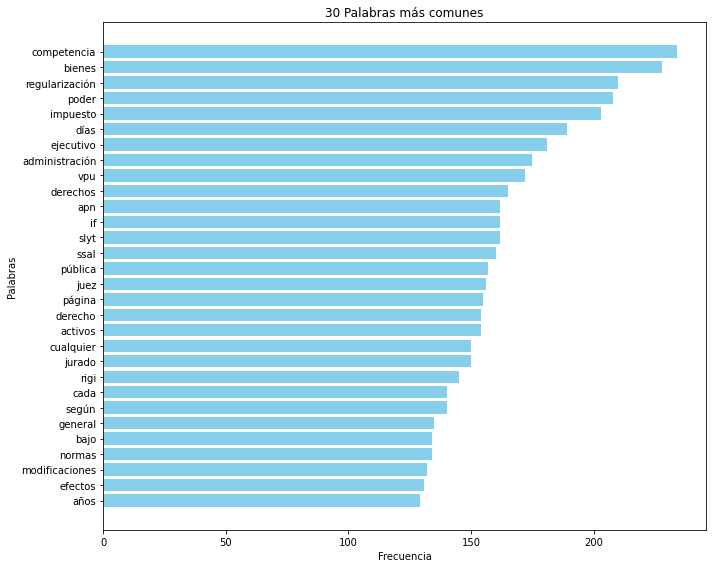

In [11]:
import matplotlib.pyplot as plt


# Crear un gráfico de barras
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
palabras, frecuencias = zip(*palabras_comunes)

# Invertir el orden de las listas
palabras = palabras[::-1]
frecuencias = frecuencias[::-1]

# Mostrar solo las primeras 30 palabras más comunes
palabras = palabras[:30]
frecuencias = frecuencias[:30]

plt.barh(palabras, frecuencias, color='skyblue')  # Usar barh para gráfico de barras horizontal
plt.ylabel('Palabras')
plt.xlabel('Frecuencia')
plt.title('30 Palabras más comunes')
plt.tight_layout()
plt.show()

### Preguntas generales

In [12]:
preguntarr('¿Cuál es el tema principal del documento?')


    # Pregunta
    ¿Cuál es el tema principal del documento?. Sé preciso y completo en tu respuesta.

    # Respuesta
    El análisis de los documentos y del contexto legal de la República Argentina revela una tendencia hacia la introducción de reformas estructurales en diversos ámbitos del ordenamiento jurídico y administrativo del país. Tales reformas parecen estar impulsadas por la necesidad de abordar situaciones de crisis y por una orientación hacia la adopción de principios de liberalismo económico y político.

En el ámbito jurídico, se destaca la implementación y regulación del juicio por jurados, lo cual refleja un esfuerzo por democratizar y transparentar el proceso judicial, permitiendo la participación directa de los ciudadanos en la administración de justicia. La normativa detalla meticulosamente el procedimiento para la selección y funcionamiento de los jurados, estableciendo claros roles, responsabilidades y protección para los involucrados, como se observa en las disposiciones que dictaminan los deberes de los jurados y las sanciones por incumplimiento.

Por otro lado, se observa una ambición de reformar aspectos fundamentales de la gestión pública y de la relación entre el Estado y la economía. Se menciona la delegación de facultades legislativas al Poder Ejecutivo con el objetivo de actuar con rapidez ante la emergencia económica y social, junto con un énfasis en la desregulación y promoción de la libertad económica, así como en la eficiencia y racionalidad de la administración pública.

De manera conjunta, estas reformas muestran un deseo por parte del gobierno argentino de modernizar y eficientizar sus estructuras, tanto a nivel económico como en la justicia y la gobernanza. Se percibe la intención de adecuar la legislación a las exigencias de la actualidad, tales como la digitalización de trámites y la mejora de los procesos administrativos, reflejando un equilibrio buscado entre los derechos y libertades individuales y las necesidades de orden y seguridad pública.

Esta compleja gama de medidas propuestas en los documentos abarca desde procedimientos penales hasta la reforma estructural del Estado, muestra claramente que la República Argentina está en un proceso de evolución legislativa significativo que potencialmente podría afectar profundamente a su economía, sociedad y sistema de gobierno. Cabe destacar que la implementación de tales reformas, y su eventual éxito, dependerá de su coherencia con la Constitución Nacional, el consenso político alcanzado, y su aceptación por la sociedad argentina.
    

In [13]:
preguntarr('dame bullets de todos los temas que trata el documento.')

### Preguntas específicas